<a href="https://colab.research.google.com/github/Ritesh1126/Deep-Learning/blob/main/Practicle_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow scikit-learn matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [3]:

# Step 1: Load the data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [4]:
# Step 4: Build the MLP model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
 #Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1926 - loss: 1.1074 - val_accuracy: 0.2500 - val_loss: 1.0675
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2294 - loss: 1.0600 - val_accuracy: 0.2500 - val_loss: 1.0398
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3019 - loss: 1.0221 - val_accuracy: 0.3750 - val_loss: 1.0082
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6533 - loss: 0.9325 - val_accuracy: 0.5000 - val_loss: 0.9761
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6028 - loss: 0.9361 - val_accuracy: 0.5833 - val_loss: 0.9392
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5960 - loss: 0.9080 - val_accuracy: 0.7917 - val_loss: 0.8978
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7038 - loss: 0.8494 - val_accuracy: 0.8750 - val_loss: 0.8518
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7784 - loss: 0.8087 - val_accuracy: 0.8750 - 

In [7]:
# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9667 - loss: 0.0588

Test Accuracy: 0.97


In [8]:
# Step 8: Predict
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("\nSample Predictions:")
for i in range(5):
    print(f"Predicted: {iris.target_names[predicted_classes[i]]} | Actual: {iris.target_names[true_classes[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Sample Predictions:
Predicted: versicolor | Actual: versicolor
Predicted: setosa | Actual: setosa
Predicted: virginica | Actual: virginica
Predicted: versicolor | Actual: versicolor
Predicted: versicolor | Actual: versicolor


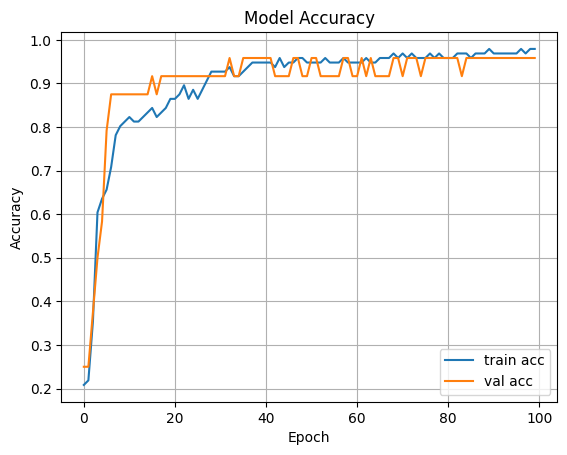

In [9]:

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
